# Projet réduction de dimensionnalité et techniques de clustering - Projet 1
## Chargement des données

In [1]:
import pandas as pd
import numpy as np
df_iris= pd.read_csv('src/iris.data', sep=',', names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Aucune donnée manquante.

In [3]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Rien d'anormal à première vue.

***
### 1. Représentation en 3 dimensions des individus suivant la longueur des sépales, des pétales et la largeur des sépales

#### Version interactive

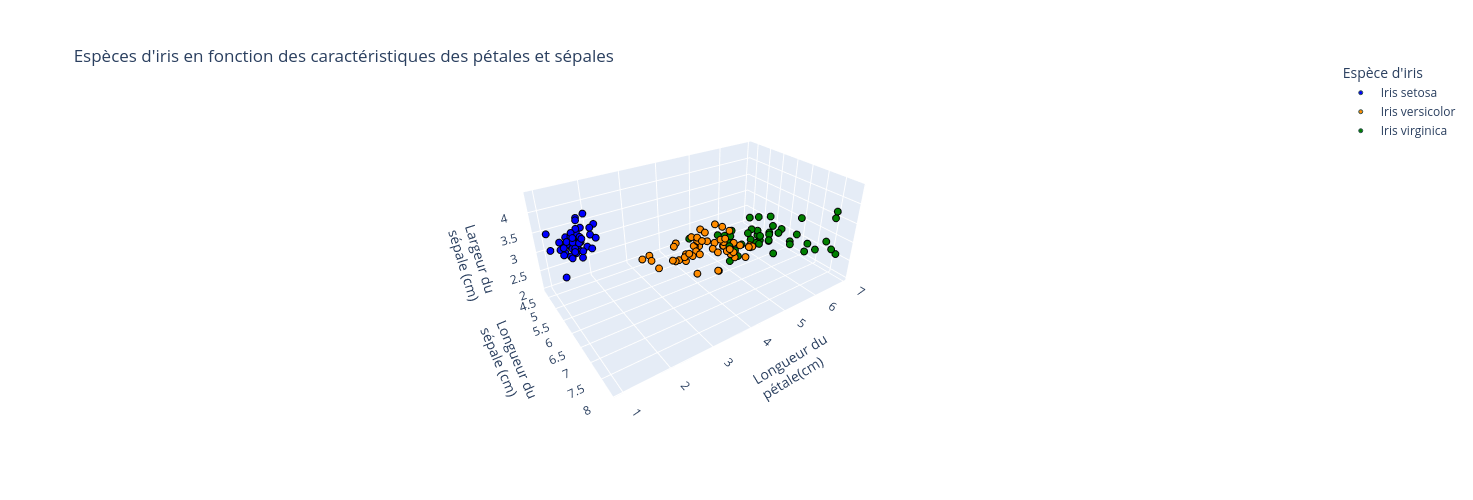

In [64]:
import plotly.express as px

#couleurs des points
color_map = {
    "Iris-setosa": "blue",
    "Iris-versicolor": "darkorange",
    "Iris-virginica": "green"
}

# Création du graphe
fig = px.scatter_3d(df_iris, x='sepal_length', y='petal_length', z='sepal_width',
                    color='class', color_discrete_map=color_map)

# Mise à jour des labels de la légende
fig.for_each_trace(
    lambda trace: trace.update(
        name = trace.name.replace("-", " ")
    )
)

# Ajout d'une bordure aux points
fig.update_traces(marker=dict(
                            size=4,
                            line=dict(width=1,
                                      color='DarkSlateGrey')
                            )
                 )

# titres, labels et vue d'origine
fig.update_layout(scene = dict(
                            xaxis_title='Longueur du<br>sépale (cm)',
                            yaxis_title='Longueur du<br>pétale(cm)',
                            zaxis_title='Largeur du<br>sépale (cm)'),
                  title_text="Espèces d'iris en fonction des caractéristiques des pétales et sépales",
                  legend_title_text ="Espèce d'iris",
                  title_y=0.9,
                  scene_camera=dict(
                      eye=dict(x=1.8, y=-1.25, z=1.25)),
                  width=800,
                  height=500,
                  autosize=False
                  )

#Affichage
fig.show()

#### Version statique

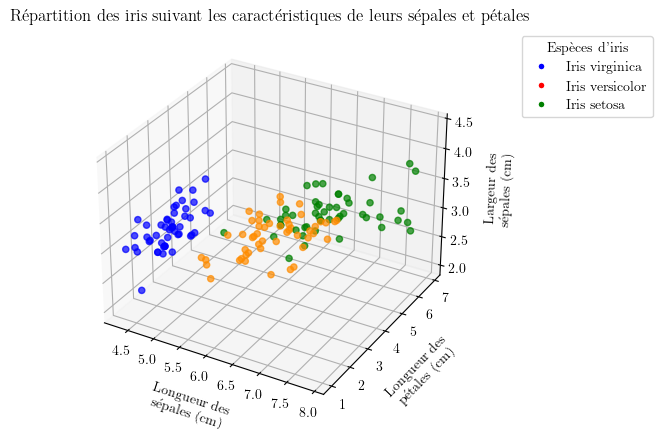

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
# Changement de police des graphiques
plt.rc('font', family = 'serif', serif = 'cmr10')
plt.rcParams.update({"text.usetex": True, "axes.formatter.use_mathtext" : True})

# Création de la figure au format 3d
fig = plt.figure(figsize = (15, 9))
ax = plt.axes(projection ='3d')

# Couleurs des points
color=['blue' if df_iris.iloc[i,4]=='Iris-setosa' else 'darkorange' if df_iris.iloc[i,4]=='Iris-versicolor' else 'green' for i in range(df_iris.shape[0])]

# Scatterplot
sctt = ax.scatter3D(df_iris['sepal_length'], df_iris['petal_length'], df_iris['sepal_width'], color=color, alpha =0.7)

# Titres et labels
ax.set_xlabel('Longueur des\nsépales (cm)')
ax.set_ylabel('Longueur des\npétales (cm)')
ax.set_zlabel('Largeur des\nsépales (cm)')
ax.set_title("Répartition des iris suivant les caractéristiques de leurs sépales et pétales")

# Ajustement marges pour éviter la troncature de labels
plt.subplots_adjust(left=0.5, right=0.76, top=1, bottom=0.15)
ax.tick_params(axis='x', pad=-0.5)
ax.tick_params(axis='y', pad=-0.5)
ax.tick_params(axis='z', pad=-0.5)

#legende
handle1 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=5, label='Iris virginica')
handle2 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=5, label='Iris versicolor')
handle3 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=5, label='Iris setosa')
plt.legend(title="Espèces d'iris", handles=[handle1, handle2, handle3], bbox_to_anchor=[1.5,1])

#Affichage
plt.show()

***
### 2. Même travail sur les données standardisées

In [66]:
from sklearn.preprocessing import StandardScaler

# Création d'un objet Scaler
scaler= StandardScaler()

# Récupération des caractéristiques des iris
features = df_iris.drop('class', axis=1)

# Standardisation des variables
scaler.fit(features)
df_iris_scaled = pd.DataFrame(scaler.transform(features), columns=features.columns)
df_iris_scaled = pd.concat([df_iris_scaled, df_iris['class']], axis=1)

# Affichage
display(df_iris_scaled.describe())
display(df_iris_scaled.head(5))

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


,sepal_length,sepal_width,petal_length,petal_width,class
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa


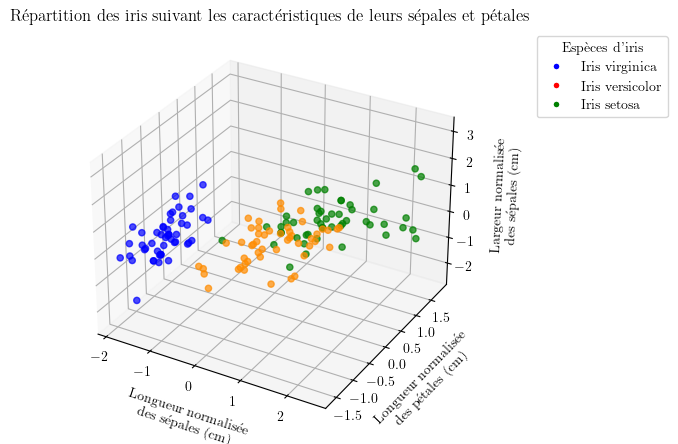

In [67]:
# Création de la figure
fig = plt.figure(figsize = (15, 9))
ax = plt.axes(projection ="3d")

# Création du graphique
sctt = ax.scatter3D(df_iris_scaled['sepal_length'], df_iris_scaled['petal_length'], df_iris_scaled['sepal_width'], color=color, alpha =0.7)

# Titres et labels
ax.set_xlabel('Longueur normalisée\ndes sépales (cm)')
ax.set_ylabel('Longueur normalisée\ndes pétales (cm)')
ax.set_zlabel('Largeur normalisée\ndes sépales (cm)')
ax.set_title("Répartition des iris suivant les caractéristiques de leurs sépales et pétales")

# Ajustement de l'affichage
ax.tick_params(axis='x', pad=-0.5)
ax.tick_params(axis='y', pad=-0.5)
ax.tick_params(axis='z', pad=-0.5)
plt.subplots_adjust(left=0.5, right=0.77, top=1, bottom=0.15)

#legende
handle1 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=5, label='Iris virginica')
handle2 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=5, label='Iris versicolor')
handle3 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=5, label='Iris setosa')
plt.legend(title="Espèces d'iris", handles=[handle1, handle2, handle3], bbox_to_anchor=[1.5,1])


plt.show()

***
### 3. Analyse en composantes principales
#### 3.1 PCA sur les données non standardisées

In [8]:
from sklearn.decomposition import PCA

# Création d'un objet PCA
pca_iris = PCA()

# Transformation des données
iris_trans = pd.DataFrame(pca_iris.fit_transform(features), columns=['PC1', 'PC2', 'PC3', 'PC4'])
iris_trans = pd.concat([iris_trans, df_iris['class']], axis=1)

iris_trans.head()

,PC1,PC2,PC3,PC4,class
0,-2.684207,0.326607,-0.021512,0.001006,Iris-setosa
1,-2.715391,-0.169557,-0.203521,0.099602,Iris-setosa
2,-2.889820,-0.137346,0.024709,0.019305,Iris-setosa
3,-2.746437,-0.311124,0.037672,-0.075955,Iris-setosa
4,-2.728593,0.333925,0.096230,-0.063129,Iris-setosa


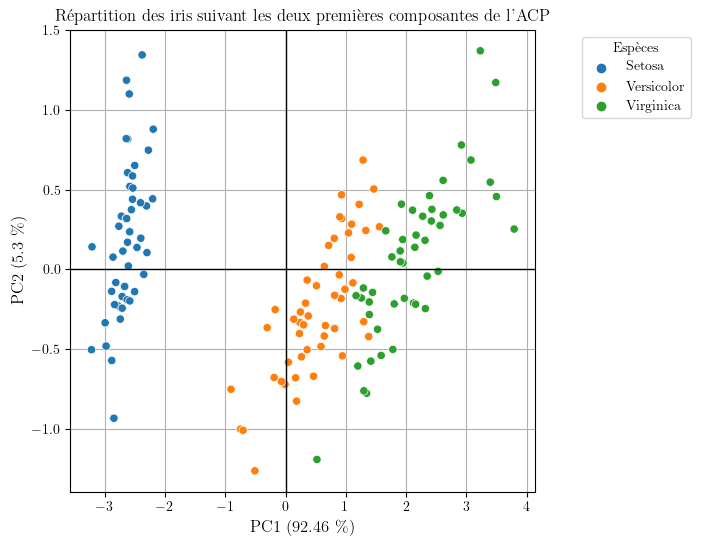

In [9]:
# Représentation des individus suivant les deux premières composantes
import seaborn as sns

fig, ax = plt.subplots(figsize=(6,6))
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
sns.scatterplot(x='PC1', y='PC2', data=iris_trans, hue='class')

# Titre et labels
plt.xlabel('PC1 ('+ str(round(pca_iris.explained_variance_ratio_[0]*100,2)) + ' \%)', fontsize=12)
plt.ylabel('PC2 ('+ str(round(pca_iris.explained_variance_ratio_[1]*100,2)) + ' \%)', fontsize=12)
plt.title("Répartition des iris suivant les deux premières composantes de l'ACP")

# Légende
new_labels = ['Setosa', 'Versicolor', 'Virginica']
legend = ax.legend(title='Espèces', bbox_to_anchor=[1.35,1], fontsize=10, title_fontsize=10)
for t, l in zip(legend.texts, new_labels): 
    t.set_text(l)

# Grille
plt.grid(visible=True)
ax.set_axisbelow(True)  # grille en arrière-plan
plt.show()

#### 3.2 PCA sur les données standardisées

In [10]:
# Création d'un objet PCA
pca_iris = PCA()

# Caractéristiques standardisées des iris
features_stand = df_iris_scaled.drop('class', axis=1)

# Transformation des données
iris_trans_stand = pd.DataFrame(pca_iris.fit_transform(features_stand), columns=['PC1', 'PC2', 'PC3', 'PC4'])
iris_trans_stand = pd.concat([iris_trans_stand, df_iris['class']], axis=1)

iris_trans_stand.head()

,PC1,PC2,PC3,PC4,class
0,-2.264542,0.505704,-0.121943,-0.023073,Iris-setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,Iris-setosa
2,-2.367950,-0.318477,0.051480,-0.027825,Iris-setosa
3,-2.304197,-0.575368,0.098860,0.066311,Iris-setosa
4,-2.388777,0.674767,0.021428,0.037397,Iris-setosa


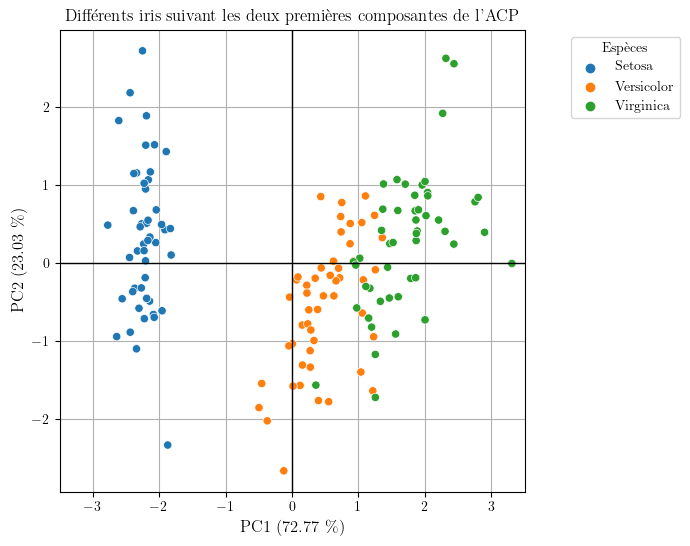

In [11]:
# Représentation des individus suivant les deux premières composantes
fig, ax = plt.subplots(figsize=(6,6))
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
sns.scatterplot(x='PC1', y='PC2', data=iris_trans_stand, hue='class')

# Titre et labels
plt.xlabel('PC1 ('+ str(round(pca_iris.explained_variance_ratio_[0]*100,2)) + ' \%)', fontsize=12)
plt.xlim(-3.5, 3.5)
plt.ylabel('PC2 ('+ str(round(pca_iris.explained_variance_ratio_[1]*100,2)) + ' \%)', fontsize=12)
plt.title("Différents iris suivant les deux premières composantes de l'ACP")

# Légende
new_labels = ['Setosa', 'Versicolor', 'Virginica']
legend = ax.legend(title='Espèces', bbox_to_anchor=[1.35,1], fontsize=10, title_fontsize=10)
for t, l in zip(legend.texts, new_labels): 
    t.set_text(l)

# Grille
plt.grid(visible=True)
ax.set_axisbelow(True)  # grille en arrière-plan
plt.show()

Dans la suite, on ne travaillera qu'avec les données standardisées.

***
### 4. Corrélation entre les variables

Entre les variables initiales ou entre les les Pc et les variables initiales ?

In [12]:
# Matrice de corrélation
matrix_cor = features_stand.corr()
matrix_cor

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


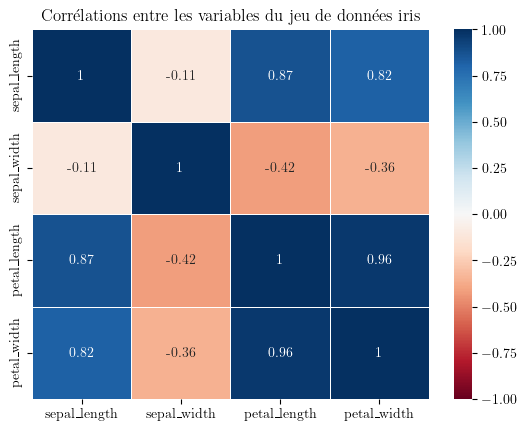

In [13]:
#Représentation par heatmap
sns.heatmap(matrix_cor, annot=True, cmap='RdBu', vmin=-1, vmax=1, center=0, linewidth=0.5)
plt.title('Corrélations entre les variables du jeu de données iris')
plt.show()

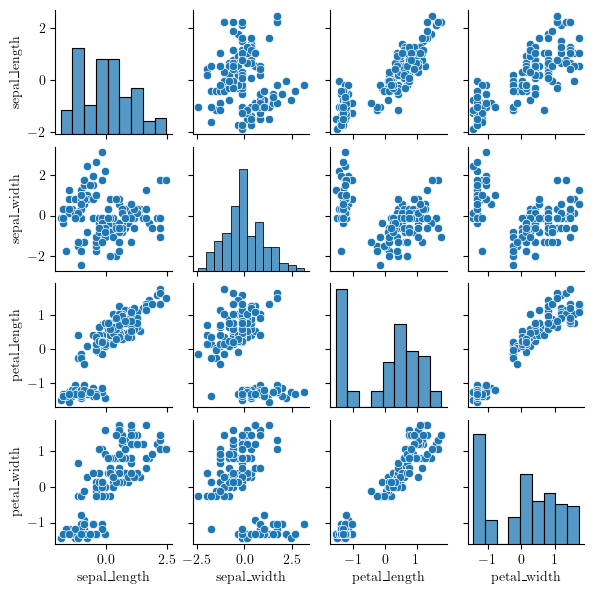

In [14]:
sns.pairplot(features_stand, height=1.5)
plt.show()

- On observe une corrélation très forte entre la longueur et la largeur des pétales
- Il existe également une forte corrélation entre largeur et longueur des pétales d'une part, et longueur des sépales d'autre part
- En revanche la largeur des sépales est faiblement corrélées avec les caractéristiques des pétales et pas corrélée du tout avec la longueur des sépales
***
### 5. Cercle des corrélations

Calcul des saturations (corrélation des PC avec les variables)

In [15]:
# Calcul des saturations des variables sur les PC
saturations = pd.DataFrame(pca_iris.components_.T*np.sqrt(pca_iris.explained_variance_),
                           columns=['PC1', 'PC2', 'PC3', 'PC4'],
                           index=df_iris.columns[0:4]
                          )
saturations

,PC1,PC2,PC3,PC4
sepal_length,0.894210,0.358549,-0.277701,-0.037736
sepal_width,-0.450818,0.891328,0.093219,0.017880
petal_length,0.995007,0.020315,0.054265,0.115394
petal_width,0.968229,0.062997,0.244110,-0.075409


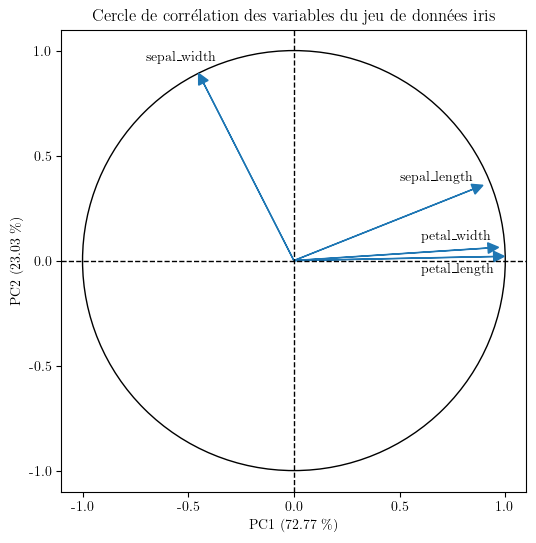

In [16]:
# Représentation par un cercle de corrélation
fig, ax = plt.subplots(figsize=(6,6))

# Tracer les axes
plt.axhline(y=0, color='black', linewidth=1, linestyle='--')
plt.axvline(x=0, color='black', linewidth=1, linestyle='--')

# Tracer le cercle de rayon 1
circle = plt.Circle((0,0),1, edgecolor='black', facecolor='white')
ax.add_artist(circle)

# Représentation des vecteurs
for i in range(saturations.shape[0]):
    x = saturations.iloc[i,0] # coord de la var i selon PC1
    y = saturations.iloc[i,1] # coord de la var i selon PC2
    
    ax.arrow(0,0,  #départ flèche
         x,y,  #fin flèche
         head_width=0.05,
         head_length=0.05,
         edgecolor='tab:blue',
         facecolor='tab:blue',
         length_includes_head=True
        )
   
    
#Ajout du nom des variables
plt.text(0.5, 0.38, 'sepal_length')
plt.text(-0.7, 0.95, 'sepal_width')
plt.text(0.6, 0.1, 'petal_width')
plt.text(0.6, -0.06, 'petal_length')

# labels et titres
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.xticks([i for i in np.arange(-1,1.5,0.5)], [str(i) for i in np.arange(-1,1.5,0.5)])
plt.yticks([i for i in np.arange(-1,1.5,0.5)], [str(i) for i in np.arange(-1,1.5,0.5)])
plt.xlabel('PC1 ('+ str(round(pca_iris.explained_variance_ratio_[0]*100,2)) + ' \%)')
plt.ylabel('PC2 ('+ str(round(pca_iris.explained_variance_ratio_[1]*100,2)) + ' \%)')
plt.title('Cercle de corrélation des variables du jeu de données iris')
plt.show()

Sur le cercle de corrélations, les variables les plus corrélées (toutes sauf la largeur des sépales) sont représentées par des vecteurs de directions similaires alors que la variable de largeur des sépales, peu corrélée avec les autres, a une direction presque orthogonale. A noter que deux vecteurs ayant une direction similaire indique une bonne corrélation entre variables uniquement si les variables sont bien représentées dans le plan factoriel (vecteur de norme proche de 1).

***
### 6. Biplot


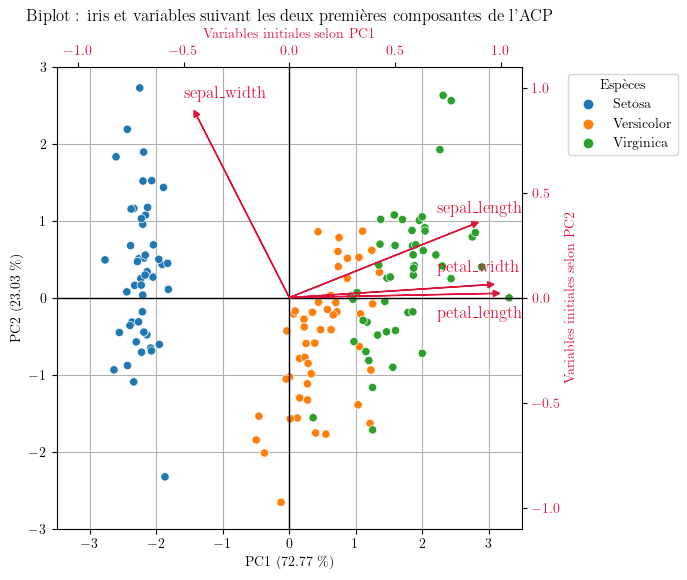

In [17]:
fig, ax = plt.subplots(figsize=(6,6))

# Représebntation des axes
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)

# Représentation des individus
sns.scatterplot(x='PC1', y='PC2', data=iris_trans_stand, hue='class')
ax.set_xlabel('PC1 ('+ str(round(pca_iris.explained_variance_ratio_[0]*100,2)) + ' \%)')
ax.set_ylabel('PC2 ('+ str(round(pca_iris.explained_variance_ratio_[1]*100,2)) + ' \%)')
plt.xlim(-3.5, 3.5)
plt.ylim(-3, 3)

#deuxième repère pour les variables
ax2 = fig.add_axes(ax.get_position(), frame_on=False)
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.set_xlabel('Variables initiales selon PC1', color='crimson')
ax2.set_ylabel('Variables initiales selon PC2', color='crimson')
ax2.tick_params(axis='both', labelcolor='crimson')
ax2.set_xlim(-1.1,1.1)
ax2.set_ylim(-1.1,1.1)
ax2.set_xticks([-1, -0.5, 0, 0.5, 1])
ax2.set_yticks([-1, -0.5, 0, 0.5, 1])

# Représentation des vecteurs
for i in range(saturations.shape[0]):
    x = saturations.iloc[i,0] # coord de la var i selon PC1
    y = saturations.iloc[i,1] # coord de la var i selon PC2
    
        
    ax2.arrow(0,0,              #départ flèche
        x,y,                    #fin flèche
        head_width=0.03,
        head_length=0.03,
        edgecolor='crimson',
        facecolor='crimson',
        length_includes_head=True
        )
    
#Ajout du nom des variables
ax2.text(0.7, 0.4, 'sepal_length', color='crimson', fontsize=12)
ax2.text(-0.5, 0.95, 'sepal_width', color='crimson', fontsize=12)
ax2.text(0.7, 0.12, 'petal_width', color='crimson', fontsize=12)
ax2.text(0.7, -0.1, 'petal_length', color='crimson', fontsize=12)

# Titre
plt.title("Biplot : iris et variables suivant les deux premières composantes de l'ACP")

# Légende
new_labels = ['Setosa', 'Versicolor', 'Virginica']
legend = ax.legend(title='Espèces', bbox_to_anchor=[1.35,1], fontsize=10, title_fontsize=10)
for t, l in zip(legend.texts, new_labels): 
    t.set_text(l)

# Grille
ax.grid(visible=True)
ax.set_axisbelow(True)  # grille en arrière-plan
plt.show()

- La part de variance expliquée par les deux premières composantes principales est 72,8 + 23.0 = 95,8 %.

- Les iris setosa ont de petits pétales et une faible longueur de sépale par rapport aux autres espèces.
- Dans l'ensemble, les iris versicolor ont de plus petits pétales et une longueur de sépale plus faible que les iris virginica, même si la séparation entre les deux groupes n'est pas franche.

***
### 7 - 8. Scree plot, règle du coude, test des bâtons brisés

#### Règle du coude


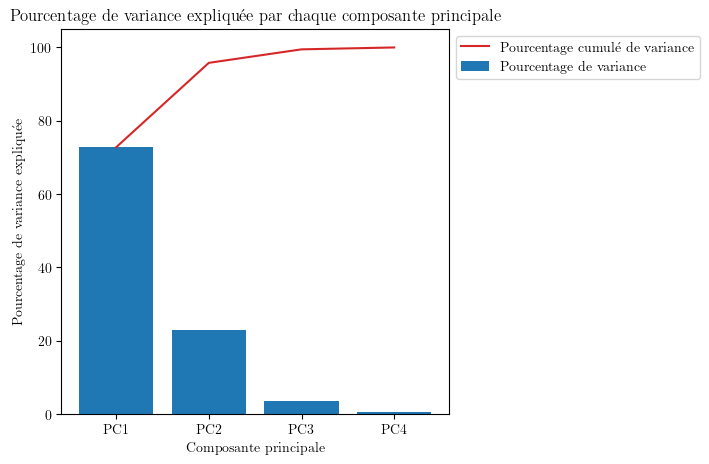

In [18]:
fig, ax = plt.subplots(figsize=(5,5))

# Pourcentage de variance expliquée par les PC
plt.bar(np.arange(1,5,1), pca_iris.explained_variance_ratio_*100, label="Pourcentage de variance", color='tab:blue')

# Pourcentage cumulé de variance expliquée
plt.plot(np.arange(1,5,1), np.cumsum(pca_iris.explained_variance_ratio_*100), color='tab:red', label="Pourcentage cumulé de variance")

plt.xticks(np.arange(1,5,1), ['PC1', 'PC2', 'PC3', 'PC4'])
plt.title("Pourcentage de variance expliquée par chaque composante principale")
plt.xlabel("Composante principale")
plt.ylabel("Pourcentage de variance expliquée")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Méthode du coude : on remarque un coude au niveau de la deuxième composante principale. Après ce coude, la courbe de pourcentage cumulé de variance expliquée a une pente faible. Cette méthode suggère de ne garder que deux composantes principales. Mais on remarque que la première composante explique déjà une bonne partie de la variance.

#### Test des bâtons brisés

In [19]:
bb = 1/np.arange(4,0,-1)   #Calcul des fraction 1/k pour k allant de 4 à 1 (ordre descendant)
bb = np.cumsum(bb)   #calcul des sommes cumulées des 1/k
bb = bb[::-1]   #inversion de la liste des valeurs pour obtenir les bâtons brisés dans le bon ordre
bb

array([2.08333333, 1.08333333, 0.58333333, 0.25      ])

In [20]:
test_bb = pd.DataFrame({'PC':np.arange(1,5), 'Val propre' : pca_iris.explained_variance_, 'batons':bb})
test_bb

,PC,Val propre,batons
0,1,2.930354,2.083333
1,2,0.927404,1.083333
2,3,0.148342,0.583333
3,4,0.020746,0.250000


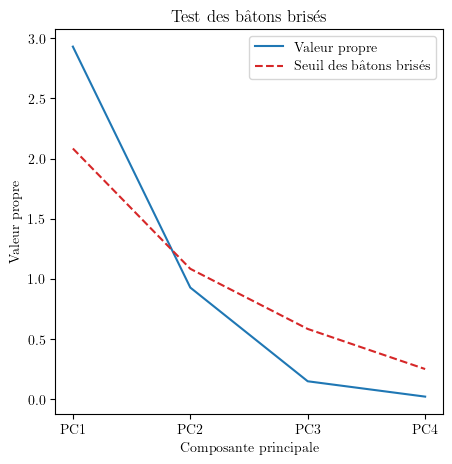

In [21]:
fig, ax = plt.subplots(figsize=(5,5))

plt.plot(test_bb['PC'], test_bb['Val propre'], label="Valeur propre", color='tab:blue')
plt.plot(test_bb['PC'], test_bb['batons'], color='tab:red', label="Seuil des bâtons brisés", linestyle="--")
plt.xticks(test_bb['PC'], ['PC1', 'PC2', 'PC3', 'PC4'])
plt.title("Test des bâtons brisés")
plt.xlabel("Composante principale")
plt.ylabel("Valeur propre")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

La méthode des bâtons brisés suggère de ne garder qu'une PC. Dans la suite, nous en garderons tout de même deux pour les raisons suivantes :
- La valeur propre de PC2 est proche du seuil 
- Garder deux composantes permet des représentations graphiques plus aisées (biplot, cercle de corrélation)

***
### 9. Table des valeurs propres et pourcentages de variable expliquée pour chaque composante principale

In [22]:
caract_pc = pd.DataFrame({'Composante':['PC1', 'PC2', 'PC3', 'PC4'], 'Valeur propre' : np.round(pca_iris.explained_variance_,2),
                         '% Variance' : np.round(pca_iris.explained_variance_ratio_,2), '% Variance cumulée' : np.round(np.cumsum(pca_iris.explained_variance_ratio_),2)})

caract_pc.set_index('Composante')

,Valeur propre,% Variance,% Variance cumulée
Composante,,,
PC1,2.93,0.73,0.73
PC2,0.93,0.23,0.96
PC3,0.15,0.04,0.99
PC4,0.02,0.01,1.00


Les valeurs propres représentent la quantité de variance expliquée par chaque composante principale. Le pourcentage de variance d'une PC est donc le pourcentage que représente sa valeur propre par rapport à la somme des valeurs propres.

***
### 10. Table de saturations des variables sur les composantes principales
Calcul fait à la question 5

In [23]:
saturations

,PC1,PC2,PC3,PC4
sepal_length,0.894210,0.358549,-0.277701,-0.037736
sepal_width,-0.450818,0.891328,0.093219,0.017880
petal_length,0.995007,0.020315,0.054265,0.115394
petal_width,0.968229,0.062997,0.244110,-0.075409


Pour la PC1, petal_length est la variable qui présente la saturation la plus forte. Sur le cercle de corrélation, la composante suivant PC1 du vecteur correspondant est proche de 1. Le vecteur a quasiment la même direction que l'axe de PC1 tout en étant très bien représenté.

***
### 11. Variable de saturation maximale pour chaque composante principale

In [24]:
table_sat_max = pd.concat([pd.DataFrame(saturations.idxmax(), columns=['Variable']),
                          round(pd.DataFrame(saturations.max(), columns=['Saturation_max']),2)],
                          axis=1)
table_sat_max

,Variable,Saturation_max
PC1,petal_length,1.00
PC2,sepal_width,0.89
PC3,petal_width,0.24
PC4,petal_length,0.12


On voit qu'aucune variable n'est fortement corrélée à PC3 et PC4.
***
### 12. Lien entre saturation et vecteurs du cercle de corrélation
- Sur le cercle de corrélation, les coordonnées du vecteur d'une variable selon les axes de ces composantes principales correspondent aux saturations de la variable sur les mêmes composantes principales. 
- Plus une variable est corrélée à une composante principale (saturation forte), plus le vecteur correspondant a à la fois une direction proche de l'axe de cette composante et une coordonnée proche de 1 sur cet axe.
- Si une variable est très faiblement corrélée avec une composante principale, alors soit la norme du vecteur correspondant est proche de 0, soit le vecteur a une direction quasiment orthogonale à celle de l'axe de la composante principale en question. 
***
### 13. Cercle de corrélation et qualité de représentation d'une variable

- La qualité de représentation d'une variable par une composante principale indique le niveau de corrélation entre la variable et la composante principale. Elle se calcule en élevant au carré la saturation correspondante (métrique appelée cos2). La qualité de représentation est donc comprise entre 0 et 1. Plus elle est grande, plus la corrélation entre la variable et la composante est forte. La composante "représente" alors bien la variable en question.

- Les qualités de représentation d'une variables par les diffétentes PC s'additionnent. Ainsi, pour obtenir la qualité de représentation sur un plan factoriel, il suffit d'ajouter les cos<sup>2</sup> de la variable correspondant aux deux composantes du plan.

- La somme des qualités de représentation d'une variable sur l'ensemble des PC est égale à 1 : une variable est complètement représentée par l'ensemble des PC.

#### Cercle de corrélation avec représentation des cos<sup>2</sup> (saturations des variables au carré)

In [25]:
cos2 = saturations**2
cos2

,PC1,PC2,PC3,PC4
sepal_length,0.799612,0.128558,0.077118,0.001424
sepal_width,0.203237,0.794465,0.008690,0.000320
petal_length,0.990038,0.000413,0.002945,0.013316
petal_width,0.937467,0.003969,0.059590,0.005686


In [54]:
# Qualité de représentation sur le plan (PC1, PC2)

cos2_pc1_2 = cos2['PC1']+cos2['PC2']
cos2_pc1_2

sepal_length    0.928169
sepal_width     0.997702
petal_length    0.990451
petal_width     0.941435
dtype: float64

In [27]:
#Echelle de couleurs pour représenter les cos2
import cmasher as cmr
import matplotlib.colors as mcolors

cmap = cmr.get_sub_cmap('cmr.ember', 0.1, 0.9)
norm = mcolors.Normalize(vmin=0, vmax=1)
color=[]
for i in range(len(cos2_pc1_2)):
    color.append(cmap(norm(cos2_pc1_2[i])))
df_cos2=pd.DataFrame({'cos2':cos2_pc1_2, 'couleur':color})
df_cos2

,cos2,couleur
sepal_length,0.928169,"(0.95164477, 0.62333052, 0.05579248, 1.0)"
sepal_width,0.997702,"(0.95597639, 0.71428878, 0.11967526, 1.0)"
petal_length,0.990451,"(0.9559217, 0.7077474, 0.11500014, 1.0)"
petal_width,0.941435,"(0.95272605, 0.63625167, 0.06470738, 1.0)"


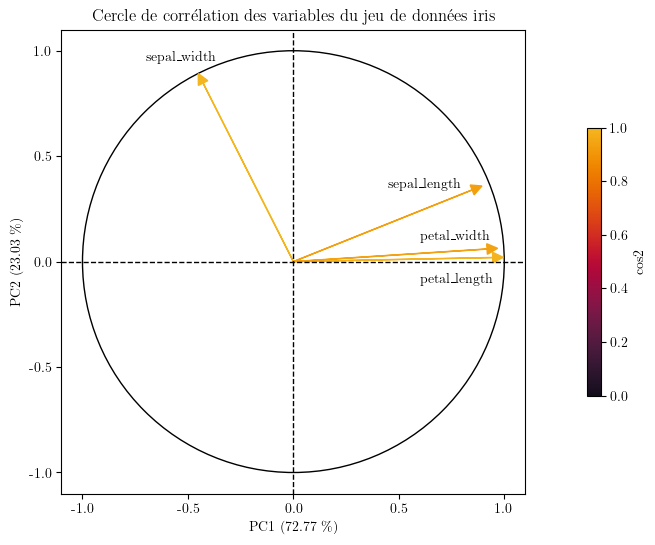

In [28]:
# Représentation par un cercle de corrélation
fig, ax = plt.subplots(figsize=(7,7))
ax.set_aspect('equal')
# Tracer les axes
plt.axhline(y=0, color='black', linewidth=1, linestyle='--')
plt.axvline(x=0, color='black', linewidth=1, linestyle='--')

# Tracer le cercle de rayon 1
circle = plt.Circle((0,0),1, edgecolor='black', facecolor='white')
ax.add_artist(circle)

# Représentation des vecteurs
for i in range(saturations.shape[0]):
    x = saturations.iloc[i,0] # coord de la var i selon PC1
    y = saturations.iloc[i,1] # coord de la var i selon PC2
    feature = features_stand.columns.values[i] # nom de la var i
    
    ax.arrow(0,0,  #départ flèche
         x,y,  #fin flèche
         head_width=0.05,
         head_length=0.05,
         length_includes_head=True,
         color=df_cos2.iloc[i,1]
        )
   
    
#Ajout du nom des variables
plt.text(0.45, 0.35, 'sepal_length')
plt.text(-0.7, 0.95, 'sepal_width')
plt.text(0.6, 0.1, 'petal_width')
plt.text(0.6, -0.1, 'petal_length')

#legende des couleurs
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_clim(vmin=0, vmax=1)
plt.colorbar(sm, label="cos2",  shrink=0.4,orientation='vertical',pad=0.1, ax=ax)

# labels et titres
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.xticks([i for i in np.arange(-1,1.5,0.5)], [str(i) for i in np.arange(-1,1.5,0.5)])
plt.yticks([i for i in np.arange(-1,1.5,0.5)], [str(i) for i in np.arange(-1,1.5,0.5)])
plt.xlabel('PC1 ('+ str(round(pca_iris.explained_variance_ratio_[0]*100,2)) + ' \%)')
plt.ylabel('PC2 ('+ str(round(pca_iris.explained_variance_ratio_[1]*100,2)) + ' \%)')
plt.title('Cercle de corrélation des variables du jeu de données iris')
plt.tight_layout()
plt.show()

Toutes les variables sont très bien expliquées sur ce plan factoriel.

#### Cercle de corrélation avec représentation des contributions

Les contributions sont la part du cos<sup>2</sup> de chaque variable parmi la somme totale des cos<sup>2</sup> pour les composantes choisies. La contribution d'une variable selon une PC indique donc à quel point la variance d'une variable contribue à la variance de la PC.

In [29]:
cos2_pc1_2 = cos2['PC1'] + cos2['PC2']
cos2_tot_pc1_2 = cos2_pc1_2.sum(axis=0)
contribution_pc1_2 = cos2_pc1_2/cos2_tot_pc1_2
contribution_pc1_2

sepal_length    0.240598
sepal_width     0.258622
petal_length    0.256743
petal_width     0.244037
dtype: float64

In [30]:
# Echelle de couleurs
cmap = cmr.get_sub_cmap('cmr.ember', 0.1, 0.9)
norm = mcolors.Normalize(vmin=0, vmax=1)
color=[]
for i in range(len(contribution_pc1_2)):
    color.append(cmap(norm(contribution_pc1_2[i])))
df_cont_pc1_2=pd.DataFrame({'contribution':contribution_pc1_2, 'couleur':color})
df_cont_pc1_2

,contribution,couleur
sepal_length,0.240598,"(0.37735107, 0.10285192, 0.26059439, 1.0)"
sepal_width,0.258622,"(0.40385611, 0.10146948, 0.26573694, 1.0)"
petal_length,0.256743,"(0.39720948, 0.10190626, 0.26456809, 1.0)"
petal_width,0.244037,"(0.38395657, 0.10259675, 0.26199608, 1.0)"


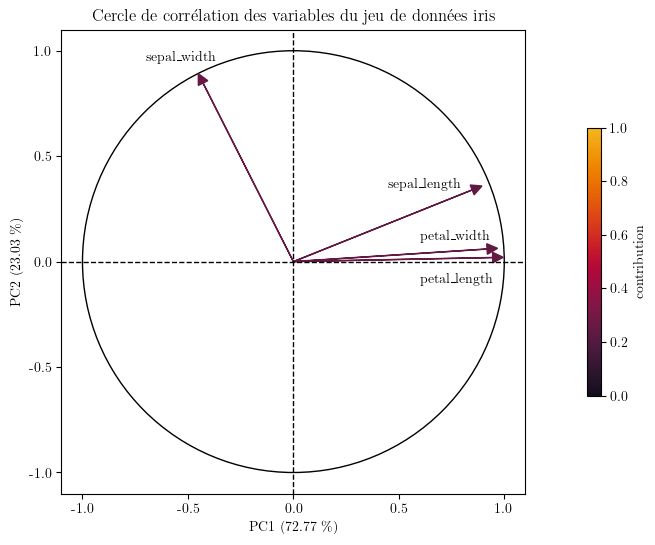

In [31]:
0# Représentation par un cercle de corrélation
fig, ax = plt.subplots(figsize=(7,7))
ax.set_aspect('equal')
# Tracer les axes
plt.axhline(y=0, color='black', linewidth=1, linestyle='--')
plt.axvline(x=0, color='black', linewidth=1, linestyle='--')

# Tracer le cercle de rayon 1
circle = plt.Circle((0,0),1, edgecolor='black', facecolor='white')
ax.add_artist(circle)

# Représentation des vecteurs
for i in range(saturations.shape[0]):
    x = saturations.iloc[i,0] # coord de la var i selon PC1
    y = saturations.iloc[i,1] # coord de la var i selon PC2
    feature = features_stand.columns.values[i] # nom de la var i
    
    ax.arrow(0,0,  #départ flèche
         x,y,  #fin flèche
         head_width=0.05,
         head_length=0.05,
         length_includes_head=True,
         color=df_cont_pc1_2.iloc[i,1]
        )
   
    
#Ajout du nom des variables
plt.text(0.45, 0.35, 'sepal_length')
plt.text(-0.7, 0.95, 'sepal_width')
plt.text(0.6, 0.1, 'petal_width')
plt.text(0.6, -0.1, 'petal_length')

#legende des couleurs
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_clim(vmin=0, vmax=1)
plt.colorbar(sm, label="contribution",  shrink=0.4,orientation='vertical',pad=0.1, ax=ax)

# labels et titres
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.xticks([i for i in np.arange(-1,1.5,0.5)], [str(i) for i in np.arange(-1,1.5,0.5)])
plt.yticks([i for i in np.arange(-1,1.5,0.5)], [str(i) for i in np.arange(-1,1.5,0.5)])
plt.xlabel('PC1 ('+ str(round(pca_iris.explained_variance_ratio_[0]*100,2)) + ' \%)')
plt.ylabel('PC2 ('+ str(round(pca_iris.explained_variance_ratio_[1]*100,2)) + ' \%)')
plt.title('Cercle de corrélation des variables du jeu de données iris')
plt.tight_layout()
plt.show()

La contribution de chaque variable aux facteurs de ce plan factoriel est à peu près la même.

***
### 14. Représentation des individus en tenant compte de la qualité de leur représentation

Le cos<sup>2</sup> d'un individu selon une composante se calcule en prenant le carré de sa coordonnée sur cette composante divisée par la somme des carrés de ses coordonnées sur l'ensemble des composantes. Ainsi, la somme des cos<sup>2</sup> d'un individu est égale à 1.

In [32]:
cos2_indiv = ((iris_trans_stand.drop('class', axis=1)**2)
              .divide(((iris_trans_stand.drop('class', axis=1)**2)
                       .sum(axis=1)),axis=0)
             )
cos2_indiv.head()

,PC1,PC2,PC3,PC4
0,0.949782,0.047365,0.002754,0.000099
1,0.898483,0.088659,0.010659,0.002199
2,0.981644,0.017757,0.000464,0.000136
3,0.938948,0.058545,0.001728,0.000778
4,0.925826,0.073873,0.000074,0.000227


Calcul de la part de la représentation de chaque individu par le plan factoriel (PC1, PC2)

In [33]:
cos2_ind_pc1_2 = cos2_indiv['PC1'] + cos2_indiv['PC2']
cos2_ind_pc1_2.head()

0    0.997147
1    0.987142
2    0.999400
3    0.997494
4    0.999699
dtype: float64

In [34]:
iris_trans_stand['cos2_pc1_2'] = cos2_ind_pc1_2
iris_trans_stand.head()

,PC1,PC2,PC3,PC4,class,cos2_pc1_2
0,-2.264542,0.505704,-0.121943,-0.023073,Iris-setosa,0.997147
1,-2.086426,-0.655405,-0.227251,-0.103208,Iris-setosa,0.987142
2,-2.367950,-0.318477,0.051480,-0.027825,Iris-setosa,0.999400
3,-2.304197,-0.575368,0.098860,0.066311,Iris-setosa,0.997494
4,-2.388777,0.674767,0.021428,0.037397,Iris-setosa,0.999699


In [35]:
# Echelle de couleurs
cmap = cmr.get_sub_cmap('cmr.ember', 0.1, 0.9)
norm = mcolors.Normalize(vmin=0, vmax=1)
color=[]
for i in range(len(iris_trans_stand)):
    color.append(cmap(norm(iris_trans_stand.iloc[i,5])))
iris_trans_stand['couleur']=color
iris_trans_stand.head()

,PC1,PC2,PC3,PC4,class,cos2_pc1_2,couleur
0,-2.264542,0.505704,-0.121943,-0.023073,Iris-setosa,0.997147,"(0.95597639, 0.71428878, 0.11967526, 1.0)"
1,-2.086426,-0.655405,-0.227251,-0.103208,Iris-setosa,0.987142,"(0.9558271, 0.70121362, 0.11034214, 1.0)"
2,-2.367950,-0.318477,0.051480,-0.027825,Iris-setosa,0.999400,"(0.95597639, 0.71428878, 0.11967526, 1.0)"
3,-2.304197,-0.575368,0.098860,0.066311,Iris-setosa,0.997494,"(0.95597639, 0.71428878, 0.11967526, 1.0)"
4,-2.388777,0.674767,0.021428,0.037397,Iris-setosa,0.999699,"(0.95597639, 0.71428878, 0.11967526, 1.0)"


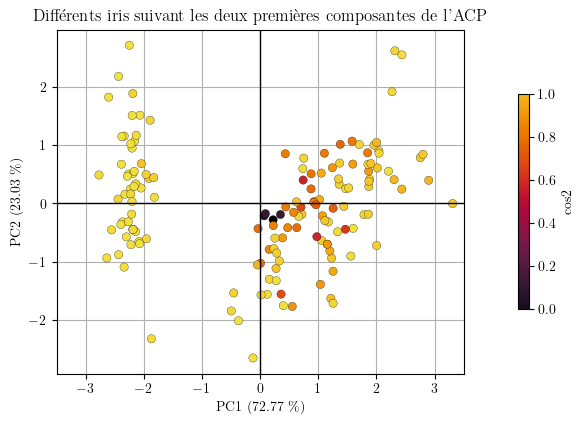

In [36]:
# Représentation des individus suivant les deux premières composantes
fig, ax = plt.subplots(figsize=(7,7))
ax.set_aspect('equal')
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
graph = ax.scatter(x=iris_trans_stand['PC1'],
                   y=iris_trans_stand['PC2'],
                   c=iris_trans_stand['cos2_pc1_2'],
                   cmap='cmr.ember',
                   edgecolor='black',
                   linewidth=0.2)

# Titre et labels
plt.xlabel('PC1 ('+ str(round(pca_iris.explained_variance_ratio_[0]*100,2)) + ' \%)')
plt.ylabel('PC2 ('+ str(round(pca_iris.explained_variance_ratio_[1]*100,2)) + ' \%)')
plt.xlim(-3.5, 3.5)
plt.title("Différents iris suivant les deux premières composantes de l'ACP")

#legende des couleurs
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_clim(vmin=0, vmax=1)
plt.colorbar(sm, label="cos2",  shrink=0.4,orientation='vertical',pad=0.1, ax=ax)

# Grille
plt.grid(visible=True)
ax.set_axisbelow(True)  # grille en arrière-plan
plt.show()

Les iris setosa sont bien représentés dans ce plan, ce qui n'est pas le cas de tous les iris versicolor et virginica. Quatre iris versicolor sont particulièrement mal représentés dans ce plan factoriel.

***
### 15. Contributions des individus à PC1 et PC2

Calcul du carré des coordonnées sur un axe, divisé par le produit du nombre total d'individus et de la variance de cet axe.

Il s'agit de la part de variance de chaque PC expliquée par chaque individu. Plus la contribution d'un individu à une PC est grande, plus cet individu est "atypique" pour cette composante par rapport aux autres individus.

In [37]:
contributions = pd.DataFrame()
n = iris_trans_stand.shape[0]
for i in range(1,5,1):
    contributions[f"PC{i}"] = (iris_trans_stand.iloc[:,i-1]**2)/(n * pca_iris.explained_variance_[i-1])
    
contributions.head()

,PC1,PC2,PC3,PC4
0,0.011667,0.001838,0.000668,0.000171
1,0.009904,0.003088,0.002321,0.003423
2,0.012757,0.000729,0.000119,0.000249
3,0.012079,0.002380,0.000439,0.001413
4,0.012982,0.003273,0.000021,0.000449


In [38]:
contrib_max = pd.concat([pd.DataFrame(contributions.idxmax(), columns=['Num_ind']),
                         pd.DataFrame(contributions.max(), columns=['Contribution'])],
                        axis=1
                       )
                         
contrib_max

,Num_ind,Contribution
PC1,118,0.024913
PC2,15,0.053276
PC3,114,0.045311
PC4,134,0.076654


L'individu le plus atypique pour PC1 est le numéro 118 qui contribut à 2,5 % de la variance de PC1.<br>
L'individu le plus atypique pour PC2 est le numéro 15 qui contribut à 5,3 % de la variance de PC2.<br>
Etc.

In [39]:
contributions.describe()

,PC1,PC2,PC3,PC4
count,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,6.622222e-03,6.622222e-03,6.622222e-03,0.006622
std,5.283602e-03,1.030192e-02,9.653926e-03,0.011048
min,5.615085e-08,4.008203e-08,8.355046e-08,0.000002
25%,1.390497e-03,7.425892e-04,7.254131e-04,0.000448
50%,6.932342e-03,2.564200e-03,2.732043e-03,0.002107
75%,1.092889e-02,7.417611e-03,8.122939e-03,0.008908
max,2.491261e-02,5.327637e-02,4.531135e-02,0.076654


***
### Questions 16 : ajout des ellipses

Fonction *confidence_ellipse* donnée par ChatGPT. J'ai compris le principe des ellipses, mais je n'aurais pas su faire le tracer moi-même.

In [107]:
def confidence_ellipse(x, y, ax, conf=0.05, alpha=0.2, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y* based on chi2 distribution.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    alpha : float
        Significance level (e.g., 0.05 for 95% confidence).

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    from matplotlib.patches import Ellipse
    import matplotlib.transforms as transforms
    from scipy.stats import chi2
    
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    lambda_, v = np.linalg.eig(cov)
    lambda_ = np.sqrt(lambda_)

    chi2_val = chi2.ppf(1-conf, 2)
    
    ellipse = Ellipse((np.mean(x), np.mean(y)),
                      width=lambda_[0]*np.sqrt(chi2_val)*2,
                      height=lambda_[1]*np.sqrt(chi2_val)*2,
                      angle=np.rad2deg(np.arctan2(*v[:,0][::-1])),
                      facecolor=facecolor,
                      alpha=alpha,
                      **kwargs)
    ax.add_patch(ellipse)
    return ellipse


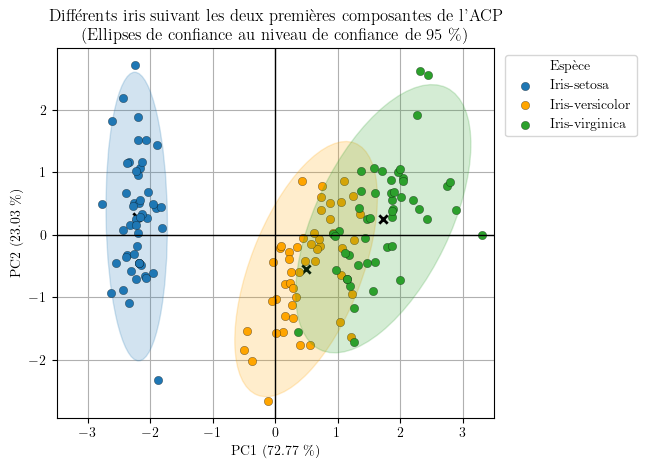

In [108]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)

for espece in iris_trans_stand['class'].unique():
    x = iris_trans_stand[iris_trans_stand['class']==espece]['PC1']
    y= iris_trans_stand[iris_trans_stand['class']==espece]['PC2']
    
    # couleurs
    if espece == 'Iris-setosa':
        couleur = "tab:blue"
        label = 'Iris-setosa'
    elif espece == 'Iris-versicolor':
        couleur = "orange"
        label = 'Iris-versicolor'
    else:
        couleur = "tab:green"
        label = 'Iris-virginica'
    
    # Ellipse de confiance au niveau de confiance de 95 % (n_std=2)
    confidence_ellipse(x, y, ax, conf=0.05, edgecolor=couleur, facecolor=couleur)
    # Centre de l'ellipse
    ax.scatter(x.mean(), y.mean(), c='black', linewidth=2, marker="x")
    
    # Individus
    ax.scatter(x=x,
               y=y,
               c=couleur,
               edgecolor='black',
               linewidth=0.2,
               label=label)

ax.legend(title='Espèce', bbox_to_anchor=(1.01,1))

# Titre et labels
plt.xlabel('PC1 ('+ str(round(pca_iris.explained_variance_ratio_[0]*100,2)) + ' \%)')
plt.ylabel('PC2 ('+ str(round(pca_iris.explained_variance_ratio_[1]*100,2)) + ' \%)')
plt.xlim(-3.5, 3.5)
plt.title("Différents iris suivant les deux premières composantes de l'ACP\n(Ellipses de confiance au niveau de confiance de 95 \%)")

# Grille
plt.grid(visible=True)
ax.set_axisbelow(True)  # grille en arrière-plan
plt.show()

- La détermination de ces ellipses ne correspondent pas à un algorithme de clustering comme le KMeans. Il ne s'agit pas d'inclure dans un même cluster tous les individus situés dans une même ellipse. On remarque d'ailleurs que plusieurs ellipses peuvent se chevaucher. S'il s'agissait d'une méthode de clustering, certains individus appartiendraient à plusieurs clusters, ce qui n'est pas possible.

    Chaque ellipse correspond à une zone de confiance, ici au niveau de confiance de 95 %. Par exemple, 95 % des iris setosa se situent dans l'ellipse bleue ci-dessus si on les représentent dans le plan factoriel (PC1, PC2).

- Un algorithme de clustering cherche à diviser l'ensemble des individus en plusieurs groupes. Les individus d'un même groupe doivent être plus semblables entre eux qu'avec les individus des autres clusters. Un individu n'appartient qu'à un cluster. Pour mesurer la similarité entre deux individus ou entre un individu et le centre d'un cluster, on utilise une distance calculée à partir de leurs valeurs prises pour chaque variable (la distance euclidienne par exemple).

    Il est important de noter qu'un algorithme de clustering est un algorithme de machine learning non supervisé. Même si les données sont classées en plusieurs catégories (les espèces d'iris par exemple), les clusters déterminés ne correspondront pas forcément à ces catégories. D'ailleurs, l'algorithme n'en tient pas compte pour ses calculs.

***
### 17. ACP et biplot en considérant la longueur des pétales comme variable supplémentaire

***
### 18. Description du fonctionnement de l'algorithme KMeans

L'algorithme KMeans est un algorithme de clustering. Il est utilisé pour partager un ensemble d'individus en plusieurs clusters. Chaque cluster possède un centre (nommé centroïde) et chaque individu est placé dans le cluster du centroïde dont il est le plus proche. Le nombre de clusters qui doivent être créés est défini par l'utilisateur. Voici les étapes de l'algorithme :

1. Initialisation : sélection des centroïdes initiaux des clusters.

2. Expéctation : l'algorithme calcule la distance entre chaque individu et chaque centroïde. Chaque individu est alors placé dans le cluster correspondant au centroïde dont il est le plus proche.

3. Maximisation : l'algorithme recalcule la position des centroïdes. Pour chaque cluster, le nouveau centroïde est le point moyen de tous les individus de ce cluster.

Les étapes 2 et 3 sont répétées en boucle jusqu'à l'une des conditions suivantes :
- il y a convergence : les individus ne changent plus de clusters d'une étape à la suivante.
- l'algorithme a atteint une condition d'arrêt comme le nombre maximal d'itérations défini par l'utilisateur.

Cette algorithme peut donner des résultats différents suivant le choix initial des centroïdes. Il convient donc de l'exécuter plusieurs fois avec des centroïdes initiaux différents. On garde alors le résultat présentant la plus faible variance intra-cluster.

***
### 19. Clustering avec l'algorithme KMeans

In [113]:
from sklearn.cluster import KMeans

data_pca = iris_trans_stand[['PC1', 'PC2']]

# instanciation et entraînement d'un objet KMeans
# Je choisis une forte valeur de n_init (nombre d'exécutions de l'algorithme en prenant des centroïdes initiaux différents 
# pour éviter d'avoir des résultats différents à chaque éxécution de la fonction et maximiser les résultats
kmeans = KMeans(n_clusters=3, n_init=50)
kmeans.fit(data_pca)

clusters3 = pd.concat([data_pca, pd.DataFrame(kmeans.labels_, columns=['cluster']), iris_trans_stand['class']], axis=1)
clusters3.sample(n=5)

,PC1,PC2,cluster,class
129,1.864778,0.555382,2,Iris-virginica
137,1.347044,0.422256,2,Iris-virginica
57,-0.497863,-1.848869,0,Iris-versicolor
40,-2.286527,0.467992,1,Iris-setosa
144,2.001691,1.048550,2,Iris-virginica


Comparaison par représentation graphique des clusters et des espèces d'iris

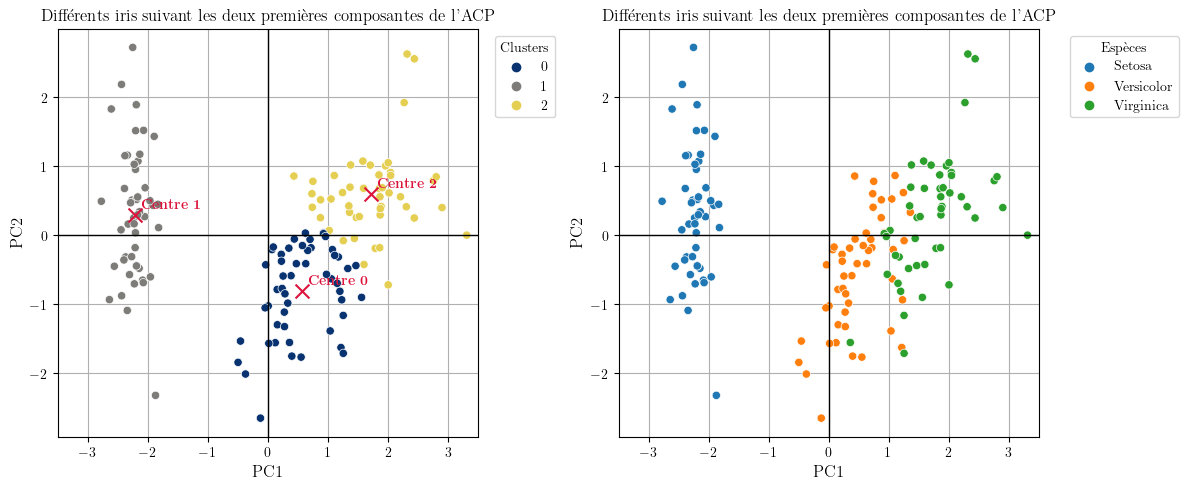

In [114]:
# Graphique représentant les points suivant les clusters
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.axhline(y=0, color='black', linewidth=1)
ax1.axvline(x=0, color='black', linewidth=1)
palette = cmr.get_sub_cmap('cividis', 0.1, 0.9)
sns.scatterplot(x='PC1', y='PC2', data=clusters3, hue='cluster', palette=palette, ax=ax1)
# Ajout des centroids
ax1.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], marker='x', color='crimson', s=100)
# Ajout du numéro du cluster
for i in range(3):
    ax1.text(kmeans.cluster_centers_[i,0]+0.1, kmeans.cluster_centers_[i,1]+0.1, f"$\\textbf{{Centre {i}}}$", color='crimson')
# Titre et labels
ax1.set_xlabel('PC1', fontsize=12)
ax1.set_xlim(-3.5, 3.5)
ax1.set_ylabel('PC2', fontsize=12)
ax1.set_title("Différents iris suivant les deux premières composantes de l'ACP")
# Légende
ax1.legend(title='Clusters', bbox_to_anchor=[1.2,1], fontsize=10, title_fontsize=10)
# Grille
ax1.grid(visible=True)
ax1.set_axisbelow(True)  # grille en arrière-plan


# Graphique représentant les points suivant les espèces
ax2.axhline(y=0, color='black', linewidth=1)
ax2.axvline(x=0, color='black', linewidth=1)
sns.scatterplot(x='PC1', y='PC2', data=clusters3, hue='class', ax=ax2)
# Titre et labels
ax2.set_xlabel('PC1', fontsize=12)
ax2.set_xlim(-3.5, 3.5)
ax2.set_ylabel('PC2', fontsize=12)
ax2.set_title("Différents iris suivant les deux premières composantes de l'ACP")
# Légende
new_labels = ['Setosa', 'Versicolor', 'Virginica']
legend = ax2.legend(title='Espèces', bbox_to_anchor=[1.35,1], fontsize=10, title_fontsize=10)
for t, l in zip(legend.texts, new_labels): 
    t.set_text(l)
# Grille
ax2.grid(visible=True)
ax2.set_axisbelow(True)  # grille en arrière-plan

plt.tight_layout()
plt.show()

Les iris setosa sont tous dans le même cluster. En revanche, certains iris virginica et versicolor ont des caractéristiques proches ce qui fait que les deux autres clusters contiennent un mélange d'espèces même si on y trouve une espèce dominante.

In [127]:
pd.crosstab(clusters3['cluster'], clusters3['class'])

class,Iris-setosa,Iris-versicolor,Iris-virginica
cluster,,,
0,0,39,14
1,50,0,0
2,0,11,36


- Le cluster 1 redroupe tous les iris setosa et uniquement ceux_là.
- 78 % des versicolors sont dans le cluster 0 et 22 % dans le cluster 2
- 28 % des virginicas sont dans le cluster 0 et 72 % dans le cluster 2

In [128]:
stats_c0 = clusters3.loc[clusters3['cluster']==0, ['PC1', 'PC2']].describe()
stats_c1 = clusters3.loc[clusters3['cluster']==1, ['PC1', 'PC2']].describe()
stats_c2 = clusters3.loc[clusters3['cluster']==2, ['PC1', 'PC2']].describe()

In [129]:
stats_c0

,PC1,PC2
count,53.000000,53.000000
mean,0.567138,-0.807675
std,0.521130,0.637605
min,-0.497863,-2.658063
25%,0.221417,-1.303103
50%,0.472370,-0.701326
75%,1.056691,-0.280848
max,1.558492,0.030331


In [130]:
stats_c1

,PC1,PC2
count,50.000000,50.000000
mean,-2.220193,0.292225
std,0.200934,0.943915
min,-2.774170,-2.327692
25%,-2.336806,-0.448629
50%,-2.205300,0.279371
75%,-2.135106,0.885582
max,-1.820412,2.722371


In [131]:
stats_c2

,PC1,PC2
count,47.000000,47.000000
mean,1.722369,0.599905
std,0.618275,0.619026
min,0.431783,-0.723865
25%,1.352642,0.278994
50%,1.847673,0.555382
75%,2.028327,0.859125
max,3.309141,2.626184


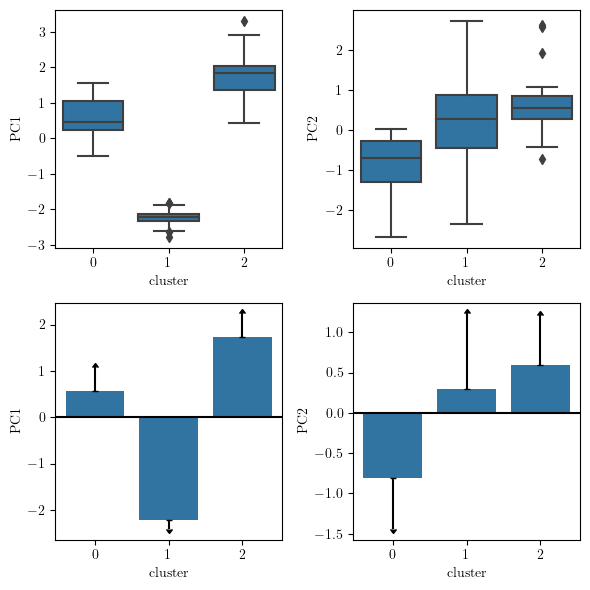

In [132]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(6,6))

sns.boxplot(x='cluster', y='PC1', data=clusters3, color='tab:blue', ax=ax1)
sns.boxplot(x='cluster', y='PC2', data=clusters3, color='tab:blue', ax=ax2)
sns.barplot(x='cluster', y='PC1', data=clusters3, color='tab:blue', errorbar=None, ax=ax3)
sns.barplot(x='cluster', y='PC2', data=clusters3, color='tab:blue', errorbar=None, ax=ax4)
ax3.errorbar(x=range(0,3,2), y=clusters3.groupby('cluster')['PC1'].mean()[0:3:2],
             yerr=clusters3.groupby('cluster')['PC1'].std()[0:2:2],
             fmt='none', capsize=2, color='black', marker=",", lolims=True)
ax3.errorbar(x=range(1,2), y=clusters3.groupby('cluster')['PC1'].mean()[1:2],
             yerr=clusters3.groupby('cluster')['PC1'].std()[1:2],
             fmt='none', capsize=2, color='black', marker=",", uplims=True)
ax3.axhline(0, color='black')
ax4.errorbar(x=range(1,3), y=clusters3.groupby('cluster')['PC2'].mean()[1:3],
             yerr=clusters3.groupby('cluster')['PC2'].std()[1:3],
             fmt='none', capsize=2, color='black', marker=",", lolims=True)
ax4.errorbar(x=range(1), y=clusters3.groupby('cluster')['PC2'].mean()[0:1],
             yerr=clusters3.groupby('cluster')['PC2'].std()[0:1],
             fmt='none', capsize=2, color='black', marker=",", uplims=True)
ax4.axhline(0, color='black')
plt.tight_layout()
plt.show()

- Le cluster 1 se distingue des deux autres sur les valeurs de PC1 de ses individus (valeurs toutes négatives et inférieures à celles des individus des autres clusters)
- Les clusters 0 et 2 se distinguent entre eux plutôt sur les valeurs de PC2 des individus :
    - plus de 75 % des individus du cluster 2 ont une PC2 supérieure à la plus grande PC2 du cluster 0 (premier quartile du cluster 2 supérieur à la valeur maximale du cluster 0)
    - la moyenne de PC2 du cluster 2 (m=0.6, std=0.6) est bien supérieure à celle du cluster 1 (m=-0.8, std=0.6)

***
### 20. Détermination du nombre optimal de clusters

In [121]:
from sklearn.metrics import silhouette_score
# clustering par Kmeans pour k clusters, k allant de 1 à 10
# création d'un dictionnaire qui fera correspondre la variance intra-clusters au nombre de clusters
dico_inertie = dict()
# même chose pour le score de silhouette
note_silhouette = dict()

for k in range(1,11):
    # Création des clusters
    kmeans = KMeans(n_clusters=k, n_init=100)
    kmeans.fit(data_pca)
    clusters = kmeans.predict(data_pca)
    dico_inertie[k] = kmeans.inertia_
    if k>1:
        note_silhouette[k] = silhouette_score(data_pca, clusters)

#### Méthode du coude

In [122]:
somme_carres = pd.DataFrame(list(dico_inertie.items()), columns=['n_clusters', 'inertie'])
somme_carres         

,n_clusters,inertie
0,1,574.805852
1,2,198.706836
2,3,116.109240
3,4,89.552707
4,5,66.300725
5,6,57.002512
6,7,47.869528
7,8,39.101234
8,9,32.150212
9,10,28.151727


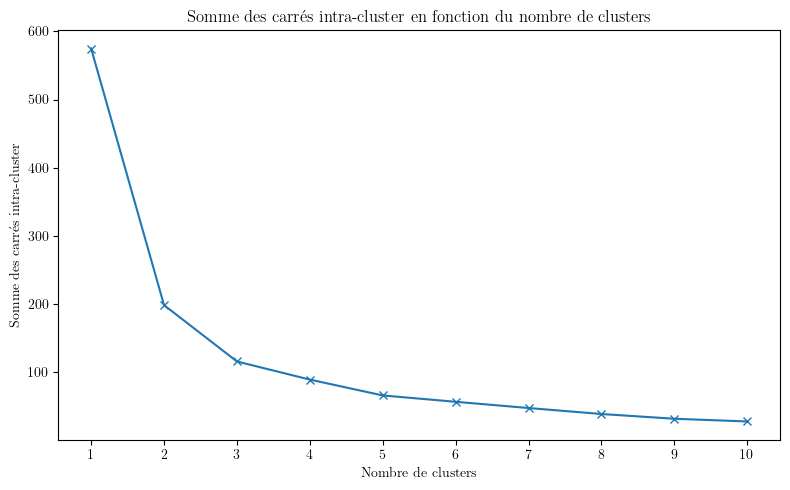

In [123]:
# Représentation de la variance intra-clusters suivant le nombre de clusters
fig, ax = plt.subplots(figsize=(8,5))

plt.plot(somme_carres['n_clusters'], somme_carres['inertie'], color='tab:blue', marker='x')
plt.xticks(range(1,11), range(1,11))
plt.xlabel('Nombre de clusters')
plt.ylabel('Somme des carrés intra-cluster')
plt.title('Somme des carrés intra-cluster en fonction du nombre de clusters')
plt.tight_layout()
plt.show()

Visuellement, 3 clusters semble un bon choix. On peut distinguer deux coudes : l'un pour 2 clusters, l'autre pour 3 clusters. Mais la pente de la courbe est encore assez forte entre 2 et 3 clusters.

#### Silhouette

In [124]:
df_sil = pd.DataFrame(list(note_silhouette.items()), columns=['n_clusters', 'silhouette'])
df_sil   

,n_clusters,silhouette
0,2,0.613037
1,3,0.508155
2,4,0.444388
3,5,0.413852
4,6,0.426650
5,7,0.435920
6,8,0.450553
7,9,0.442318
8,10,0.448075


Le score de silhouette le plus élevé est celui correspondant à 2 clusters. Cette méthode suggère donc que le nombre optimal de clusters est 2. Cela peut se comprendre tant les groupes des iris versicolor et virginica se chevauchent. La représentation graphique dans le cas de deux clusters montre d'ailleurs un cluster pour les iris setosa et un autre pour les iris versicolor et virginica.

In [125]:
data_pca = iris_trans_stand[['PC1', 'PC2']]

kmeans = KMeans(n_clusters=2, n_init=100)
kmeans.fit(data_pca)

clusters2 = pd.concat([data_pca, pd.DataFrame(kmeans.labels_, columns=['cluster'])], axis=1)
clusters2.sample(n=5)

,PC1,PC2,cluster
116,1.471280,0.253192,1
120,2.040496,0.907399,1
13,-2.639716,-0.938282,0
117,2.437378,2.556757,1
6,-2.445711,0.074563,0


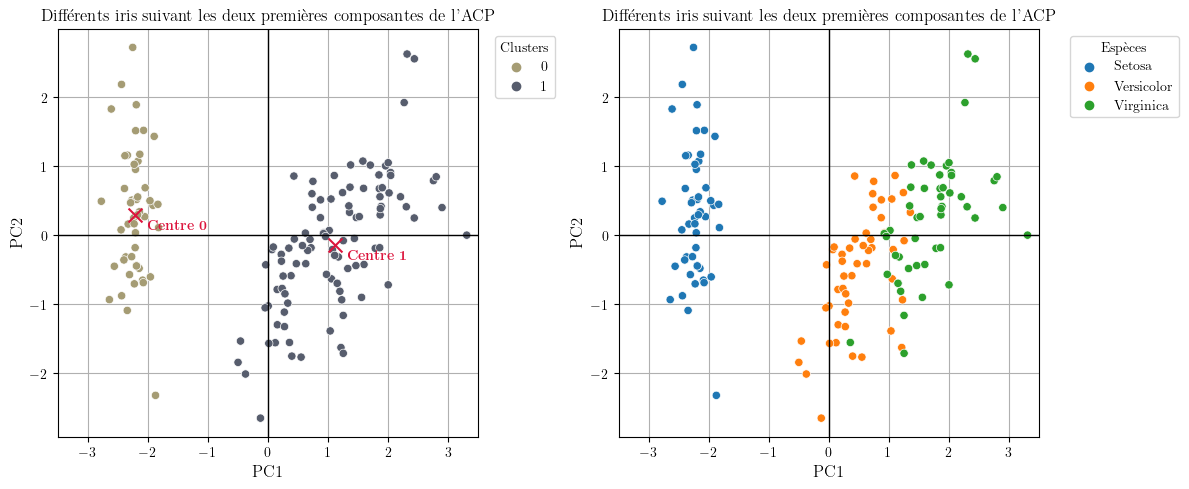

In [126]:
# Graphique représentant les points suivant les clusters
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.axhline(y=0, color='black', linewidth=1)
ax1.axvline(x=0, color='black', linewidth=1)
palette = cmr.get_sub_cmap('cividis', 0.1, 0.9)
sns.scatterplot(x='PC1', y='PC2', data=clusters2, hue='cluster', palette='cividis_r', ax=ax1)
# Ajout des centroids
ax1.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], marker='x', color='crimson', s=100)
# Ajout du numéro du cluster
for i in range(2):
    ax1.text(kmeans.cluster_centers_[i,0]+0.2, kmeans.cluster_centers_[i,1]-0.2, f"$\\textbf{{Centre {i}}}$", color='crimson')
# Titre et labels
ax1.set_xlabel('PC1', fontsize=12)
ax1.set_xlim(-3.5, 3.5)
ax1.set_ylabel('PC2', fontsize=12)
ax1.set_title("Différents iris suivant les deux premières composantes de l'ACP")
# Légende
ax1.legend(title='Clusters', bbox_to_anchor=[1.2,1], fontsize=10, title_fontsize=10)
# Grille
ax1.grid(visible=True)
ax1.set_axisbelow(True)  # grille en arrière-plan



# Graphique représentant les points suivant les espèces
ax2.axhline(y=0, color='black', linewidth=1)
ax2.axvline(x=0, color='black', linewidth=1)
sns.scatterplot(x='PC1', y='PC2', data=clusters3, hue='class', ax=ax2)
# Titre et labels
ax2.set_xlabel('PC1', fontsize=12)
ax2.set_xlim(-3.5, 3.5)
ax2.set_ylabel('PC2', fontsize=12)
ax2.set_title("Différents iris suivant les deux premières composantes de l'ACP")
# Légende
new_labels = ['Setosa', 'Versicolor', 'Virginica']
legend = ax2.legend(title='Espèces', bbox_to_anchor=[1.35,1], fontsize=10, title_fontsize=10)
for t, l in zip(legend.texts, new_labels): 
    t.set_text(l)
# Grille
ax2.grid(visible=True)
ax2.set_axisbelow(True)  # grille en arrière-plan

plt.tight_layout()
plt.show()